In [230]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import plotly.express as px
import numpy as np

In [231]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


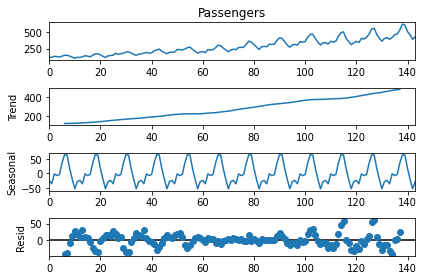

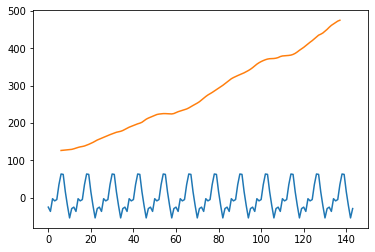

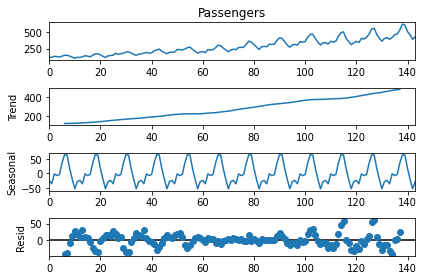

In [232]:
result = seasonal_decompose(df['Passengers'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [233]:
fig = px.line(df, df['Month'], df['Passengers'])
fig.show()

In [234]:
def low_high_band(N,Wn, filter_name):
    b, a = signal.butter(N, Wn, filter_name)
    filtered = signal.filtfilt(b, a, df['Passengers'])
    fig = px.line(filtered, df['Month'], filtered, title=filter_name)
    fig.show()

In [235]:
low_high_band(5, 0.5, 'lowpass')

In [236]:
low_high_band(5, 0.05, 'highpass')

In [237]:
low_high_band(5, [0.05, 0.1], 'band')

In [238]:
avg = np.mean(df['Passengers'])
df['Average'] = avg
avg

280.2986111111111

In [239]:
fig = px.line(df, x = df['Month'], y = df.columns)
fig.show()

In [240]:
df_pt2 = df[['Month', 'Passengers']].copy()
df_pt2['Moving Average'] = df['Passengers'].rolling(window=3).mean()
fig = px.line(df_pt2, df_pt2['Month'], df_pt2.columns)
fig.show()

In [241]:
weights = np.array([0.05, 0.1, 0.2])
df_pt2['Exponential MA'] = df['Passengers'].rolling(3).apply(lambda x: np.sum(weights*x))
fig = px.line(df_pt2, df_pt2['Month'], df_pt2.columns)
fig.show()

In [242]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.shape

(1462, 5)

In [243]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


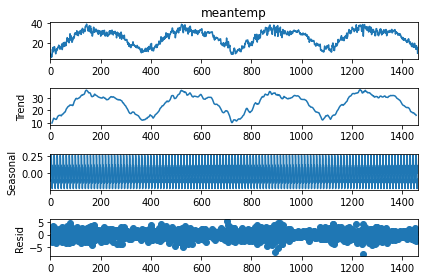

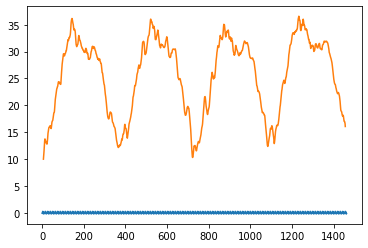

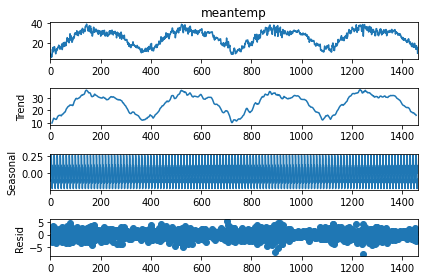

In [244]:
result = seasonal_decompose(df['meantemp'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [245]:
fig = px.line(df, df['date'], df['meantemp'])
fig.show()

In [246]:
def low_high_band(N,Wn, filter_name):
    b, a = signal.butter(N, Wn, filter_name)
    filtered = signal.filtfilt(b, a, df['meantemp'])
    fig = px.line(filtered, df['date'], filtered, title=filter_name)
    fig.show()

In [247]:
low_high_band(1, 0.01, 'lowpass')

In [248]:
low_high_band(1, 0.01, 'highpass')

In [249]:
low_high_band(4, [0.05, 0.1], 'band')

In [250]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [252]:
avg = np.mean(df['meantemp'])
df['Average'] = avg
print(avg)
df.drop(['humidity', 'wind_speed', 'meanpressure',], axis=1, inplace = True)

25.495520655761762


In [253]:
fig = px.line(df, x = df['date'], y = df.columns)
fig.show()

In [254]:
df_pt2 = df[['date', 'meantemp']].copy()
df_pt2['Moving Average'] = df['meantemp'].rolling(window=3).mean()
fig = px.line(df_pt2, df_pt2['date'], df_pt2.columns)
fig.show()

In [256]:
weights = np.array([0.05, 0.1, 0.2])
df_pt2['Exponential MA'] = df['meantemp'].rolling(3).apply(lambda x: np.sum(weights*x))
fig = px.line(df_pt2, df_pt2['date'], df_pt2.columns)
fig.show()